In [1]:
import os
import pandas as pd
import pycaret.classification as clf

import utils as my

## Monitoring & Check `history.csv`

### Training results

In [10]:
df_history = pd.read_csv("./models/history.csv")
# df_history = df_history.loc[df_history["LogLoss"] < 0.1, :]
my.show_history(df_history, mode="Train", sort_by=['Prec.', 'AUC'])

,1,3
Model,base,base
Accuracy,0.962600,0.962600
AUC,1.000000,1.000000
Recall,0.435900,0.435900
Prec.,1.000000,1.000000
F1,0.607100,0.607100
LogLoss,0.087500,0.087500
Tact,0:03:04,0:03:03
imputation_type,simple,simple
fix_imbalance,False,False


### Test restuls

In [11]:
df_history = pd.read_csv("./models/history.csv")
# df_history = df_history.loc[(df_history["LogLoss"] < 0.4) & (df_history["AUC"] > 0.8), :]
my.show_history(df_history, mode="Test", sort_by=['Prec.', 'AUC'])

,1,3
Model,base,base
Accuracy,0.933700,0.933700
AUC,0.763700,0.762900
Recall,0.000000,0.000000
Prec.,0.000000,0.000000
F1,0.000000,0.000000
LogLoss,0.213800,0.213900
Tact,0:03:04,0:03:03
imputation_type,simple,simple
fix_imbalance,False,False


## Metrics

In [6]:
dataset_path = "./uci-secom.csv"
target_name = "Pass/Fail"
train_size = 0.75
seed = 111

train, test = my.get_data(dataset_path, train_size, seed, target_name=target_name)

Train Data: (1175, 592)
Test  Data: (392, 592) 



### Default model (all default parameters)

Transformation Pipeline and Model Successfully Loaded
>> <class 'sklearn.ensemble._forest.RandomForestClassifier'>
>> Train scores:
   Model  Accuracy  AUC  Recall  Prec.      F1  LogLoss Tact
0          0.9626  1.0  0.4359    1.0  0.6071   0.0875     


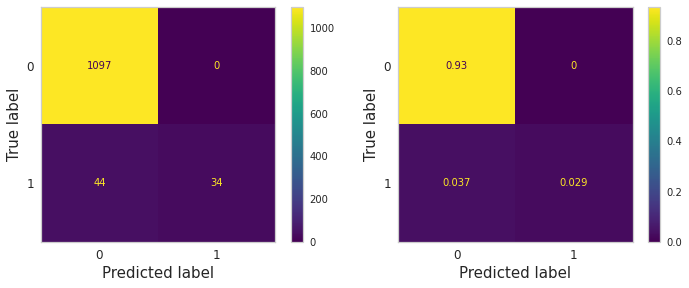

>> Test scores:
   Model  Accuracy     AUC  Recall  Prec.   F1  LogLoss Tact
0          0.9337  0.7637     0.0    0.0  0.0   0.2138     


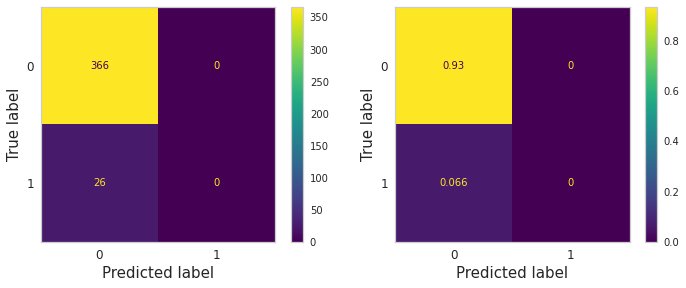

In [7]:
## Default model
model_name = "base__train__Accuracy-0.9626_AUC-1.0000__test__Accuracy-0.9337_AUC-0.7637__seed-111"
model = clf.load_model(os.path.join("./models", model_name))
train_scores = my.get_scores(model, train, train[target_name])
test_scores = my.get_scores(model, test, test[target_name])

print(">>", type(model.steps[-1][-1]))
# print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# print(">>", model.steps[-1][-1])
print(">> Train scores:\n", train_scores)
my.show_confusion_matrix(model, train, train[target_name])
print(">> Test scores:\n", test_scores)
my.show_confusion_matrix(model, test, test[target_name])

### Baseline model

In [9]:
model_name = ""
# model = clf.load_model(os.path.join("./models", model_name))
# train_scores = my.get_scores(model, train, train[target_name])
# test_scores = my.get_scores(model, test, test[target_name])

# print(">>", type(model.steps[-1][-1]))
# # print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# # print(">>", model.steps[-1][-1])
# print(">> Train scores:\n", train_scores)
# my.show_confusion_matrix(model, train, train[target_name])
# print(">> Test scores:\n", test_scores)
# my.show_confusion_matrix(model, test, test[target_name])

### Tuned models

In [8]:
## Baseline model
model_name = ""
# model = clf.load_model(os.path.join("./models", model_name))
# train_scores = my.get_scores(model, train, train[target_name])
# test_scores = my.get_scores(model, test, test[target_name])

# print(">>", type(model.steps[-1][-1]))
# # print(">>", [x[0] for x in model.steps[-1][-1].estimators])
# # print(">>", model.steps[-1][-1])
# print(">> Train scores:\n", train_scores)
# my.show_confusion_matrix(model, train, train[target_name])
# print(">> Test scores:\n", test_scores)
# my.show_confusion_matrix(model, test, test[target_name])